In [1]:
import statistics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns= None
pd.options.display.max_rows= None
np.set_printoptions(suppress=True)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("E://accepted_2007_to_2018Q4.csv")

C:\Users\avitr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [4]:
data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    id                                          object 
 1    member_id                                   float64
 2    loan_amnt                                   float64
 3    funded_amnt                                 float64
 4    funded_amnt_inv                             float64
 5    term                                        object 
 6    int_rate                                    float64
 7    installment                                 float64
 8    grade                                       object 
 9    sub_grade                                   object 
 10   emp_title                                   object 
 11   emp_length                                  object 
 12   home_ownership                              object 
 13   annual_inc

In [5]:
data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.47

In [6]:
data.isnull().sum()

id                                                  0
member_id                                     2260701
loan_amnt                                          33
funded_amnt                                        33
funded_amnt_inv                                    33
term                                               33
int_rate                                           33
installment                                        33
grade                                              33
sub_grade                                          33
emp_title                                      167002
emp_length                                     146940
home_ownership                                     33
annual_inc                                         37
verification_status                                33
issue_d                                            33
loan_status                                        33
pymnt_plan                                         33
url                         

In [7]:
data.shape

(2260701, 151)

# The Questions Here are:
* How to predict if the lender will fully pay the money be lent from Lending club? 
* How to decrease the risk of Not pay back?

# We have a big point here to Focus on:
The data has a lot of columns about lending club data, the data contains several columns about irrelevant data that not created untill the loan been accepted, so just I want to consider the data columns that focus on the process before accepting the applicant to take the Loan.

Here I will remove some columns that are irrelevant

In [8]:
cols_to_drop = ["id", "member_id","issue_d","earliest_cr_line", "funded_amnt", "funded_amnt_inv", "int_rate", "grade", "sub_grade", "emp_title", "pymnt_plan", "url", "desc", "title", "zip_code", "addr_state", "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d", "last_fico_range_high", "last_fico_range_low", "policy_code", "hardship_flag", "hardship_type", "hardship_reason", "hardship_status", "deferral_term", "hardship_amount", "hardship_start_date", "hardship_end_date", "payment_plan_start_date", "hardship_length", "hardship_dpd", "hardship_loan_status", "orig_projected_additional_accrued_interest", "hardship_payoff_balance_amount", "hardship_last_payment_amount", "disbursement_method", "debt_settlement_flag", "debt_settlement_flag_date", "settlement_status", "settlement_date", "settlement_amount", "settlement_percentage", "settlement_term"]

In [9]:
data.drop(columns =cols_to_drop, inplace = True )

In [10]:
data.head()

,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,3600.0,36 months,123.03,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,5.91,0.0,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,3600.00,821.72,0.0,0.0,0.0,0.0,30.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24700.0,36 months,820.28,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,16.06,1.0,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,24700.00,979.66,0.0,0.0,0.0,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20000.0,60 months,432.66,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,home_improvement,10.78,0.0,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,20000.00,2705.92,0.0,0.0,0.0,0.0,NaN,Joint App,71000.0,13.85,Not Verified,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35000.0,60 months,829.90,10+ years,MORTGAGE,110000.0,Source Verified,Current,debt_consolidation,17.06,0.0,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,19102.35,12361.66,0.0,0.0,0.0,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10400.0,60 months,289.91,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,25.37,1.0,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,10400.00,1340.50,0.0,0.0,0.0,0.0,NaN,Indiv

In [11]:
data.shape

(2260701, 100)

After that we will remove columns that have more than 35% of Null values

In [12]:
drop_nan = data.isnull().sum()
drop_nan = drop_nan[drop_nan.values > (len(data) * 0.30)]
drop_nan_dun = pd.DataFrame(drop_nan)
drop_nan_dun = drop_nan.index
drop_nan_dun

Index(['mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog'],
      dtype='object')

In [13]:
data.drop(labels= drop_nan_dun, inplace = True, axis = 1)

In [14]:
data.head()

,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,36 months,123.03,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,3600.00,821.72,0.0,0.0,0.0,0.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,36 months,820.28,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,24700.00,979.66,0.0,0.0,0.0,0.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,60 months,432.66,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,home_improvement,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,20000.00,2705.92,0.0,0.0,0.0,0.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
3,35000.0,60 months,829.90,10+ years,MORTGAGE,110000.0,Source Verified,Current,debt_consolidation,17.06,0.0,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,19102.35,12361.66,0.0,0.0,0.0,0.0,Individual,0.0,0.0,301500.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0
4,10400.0,60 months,289.91,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,10400.00,1340.50,0.0,0.0,0.0,0.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0


In [15]:
data.shape

(2260701, 65)

# Lets see our Target(loan_status) and see how to manage it

In [16]:
data.groupby("loan_status").mean()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,15565.055444,465.147994,70400.743283,20.171196,0.351867,687.850119,691.850171,0.777985,11.901269,0.246843,15353.500553,54.758433,24.709356,4387.877516,2689.126532,4.622596,1209.456926,201.526243,0.021850,0.005656,239.577186,118843.247637,28947.910630,5.326243,10934.066703,7678.911889,63.665799,0.009760,19.434139,123.073543,171.992782,11.364417,6.898494,1.371032,20.671982,6.070086,0.536925,3.828555,6.108062,4.817734,7.935719,8.661638,8.576686,14.529540,6.036183,11.930625,0.000899,0.003741,0.098795,2.492784,93.981188,49.985905,0.153594,0.059898,146618.512014,49308.868645,18538.137408,42024.006641
Current,15942.815920,455.755848,80671.621615,19.617017,0.287682,702.561154,706.561439,0.444576,11.644579,0.169382,17299.134700,48.066402,22.952884,5552.729755,2443.901306,0.862228,0.000000,0.000000,0.019505,0.002786,208.536312,144773.180395,37296.640931,4.249941,13668.848140,13247.856970,54.879021,0.007488,8.390733,125.768706,181.903197,15.378178,8.963469,1.396252,26.445219,7.526777,0.483931,3.722173,5.602211,4.832253,7.202822,8.187747,8.199846,13.153654,5.551122,11.612790,0.000386,0.001922,0.073816,1.919358,94.083470,38.398396,0.118005,0.038116,184288.529505,52963.221320,25601.929248,45963.130956
Default,14350.625000,438.939250,74176.800000,17.263250,0.225000,703.375000,707.375000,0.500000,11.325000,0.275000,10944.475000,43.595000,21.850000,4777.297750,3512.402750,39.481500,0.000000,0.000000,0.050000,0.000000,160.775000,126542.050000,28697.500000,5.475000,12363.625000,10568.973684,49.147368,0.025000,0.000000,102.128205,159.700000,17.275000,7.800000,1.200000,25.052632,5.657895,0.225000,3.650000,5.150000,4.650000,7.275000,8.025000,7.775000,12.475000,5.025000,11.300000,0.000000,0.000000,0.025000,2.350000,94.712500,32.718421,0.150000,0.100000,156091.075000,46255.275000,19470.000000,42916.675000
Does not meet the credit policy. Status:Charged Off,9527.233903,305.158804,69525.915033,14.343732,0.215040,680.394218,684.394218,4.672823,10.001319,0.124011,27413.918528,54.850172,22.197889,2880.658213,1338.826032,5.231312,594.499760,124.747580,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121101,0.000000,NaN,NaN,NaN,NaN
Does not meet the credit policy. Status:Fully Paid,8853.231891,287.069225,72145.418271,14.107173,0.248216,686.619718,690.619718,4.000510,10.102446,0.093782,27406.463783,52.169601,22.787462,8679.375558,1857.286751,2.658950,0.000000,0.000000,0.000000,0.002039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,3.098879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067708,0.000518,NaN,NaN,NaN,NaN
Fully Paid,14134.369808,431.323226,77705.945505,17.811629,0.309296,698.263902,702.264062,0.624426,11.516763,0.207403,16471.246042,51.074671,25.048551,14125.849707,2326.569791,0.824845,0.000000,0.000000,0.015957,0.004893,251.870394,146779.741576,33764.341917,4.532947,14135.645106,10818.858498,58.999460,0.008888,13.763524,126.485803,183.878055,13.559274,8.0

* Here we won't deal with current loan becasue we don't Know if it will be charged off or fully paid in the future, also we will remove (Defaluters, Late (16-30 days),Late (31-120 days),in grace period)
* we will add The credit policy to both of Charged off and Fully Paid

In [17]:
credit_policy = "Does not meet the credit policy. Status:"
len_credit_policy = len(credit_policy)
remove_credit_policy = (
    lambda status: status[len_credit_policy:]
    if credit_policy in str(status)
    else status
)
data["loan_status"] = data["loan_status"].map(remove_credit_policy)

rows_to_drop = data[
    (data["loan_status"] != "Charged Off") & (data["loan_status"] != "Fully Paid")
].index
data.drop(index=rows_to_drop, inplace=True)

data.groupby("loan_status")["loan_status"].count()

loan_status
Charged Off     269320
Fully Paid     1078739
Name: loan_status, dtype: int64

In [18]:
data["loan_status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [19]:
data.groupby("loan_status").mean()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,15547.994765,464.695923,70398.271338,20.154726,0.351482,687.829051,691.829103,0.788948,11.895922,0.246498,15387.578891,54.758690,24.702288,4383.618665,2685.311076,4.624316,1207.719281,201.309295,0.021790,0.005640,239.577186,118843.247637,28947.910630,5.326243,10934.066703,7678.911889,63.665799,0.009733,19.379441,123.073543,171.992782,11.364417,6.898494,1.371032,20.671982,6.070086,0.536925,3.828555,6.108062,4.817734,7.935719,8.661638,8.576686,14.529540,6.036183,11.930625,0.000899,0.003741,0.098795,2.492784,93.981188,49.985905,0.153528,0.059731,146618.512014,49308.868645,18538.137408,42024.006641
Fully Paid,14124.637238,431.057382,77695.718632,17.804800,0.309185,698.242443,702.242603,0.630567,11.514191,0.207196,16491.398473,51.076656,25.044438,14115.812440,2325.704952,0.828225,0.000000,0.000000,0.015929,0.004888,251.870394,146779.741576,33764.341917,4.532947,14135.645106,10818.858498,58.999460,0.008872,13.744127,126.485803,183.878055,13.559274,8.096964,1.746468,24.611516,6.881271,0.502646,3.595665,5.525808,4.713104,8.142996,8.544145,8.203412,14.630811,5.480315,11.565335,0.000800,0.003337,0.086373,2.099380,94.211148,43.937311,0.129579,0.050104,181421.577629,49756.612387,22415.686699,42160.850628


In [20]:
data.isnull().sum()

loan_amnt                          0
term                               0
installment                        0
emp_length                     78545
home_ownership                     0
annual_inc                         4
verification_status                0
loan_status                        0
purpose                            0
dti                              374
delinq_2yrs                       29
fico_range_low                     0
fico_range_high                    0
inq_last_6mths                    30
open_acc                          29
pub_rec                           29
revol_bal                          0
revol_util                       897
total_acc                         29
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
collections_12_mths_ex_med       145
application_type                   0
acc_now_delinq                    29
t

In [21]:
for col in data.columns:
  if isinstance(data[col][0], float):
    # do the median.
    median_data = statistics.median(data[col][:])
    data[col].fillna(median_data, inplace = True)
    #print(median_data)
  else: # isinstance(df[col][0], str):
    # do the mode.
    mode_data = statistics.mode(data[col][:])
    data[col].fillna(mode_data, inplace = True)
    #print(mode_data)

In [22]:
data.isnull().sum()

loan_amnt                     0
term                          0
installment                   0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
acc_open_past_24mths          0
avg_cur_

<AxesSubplot:>

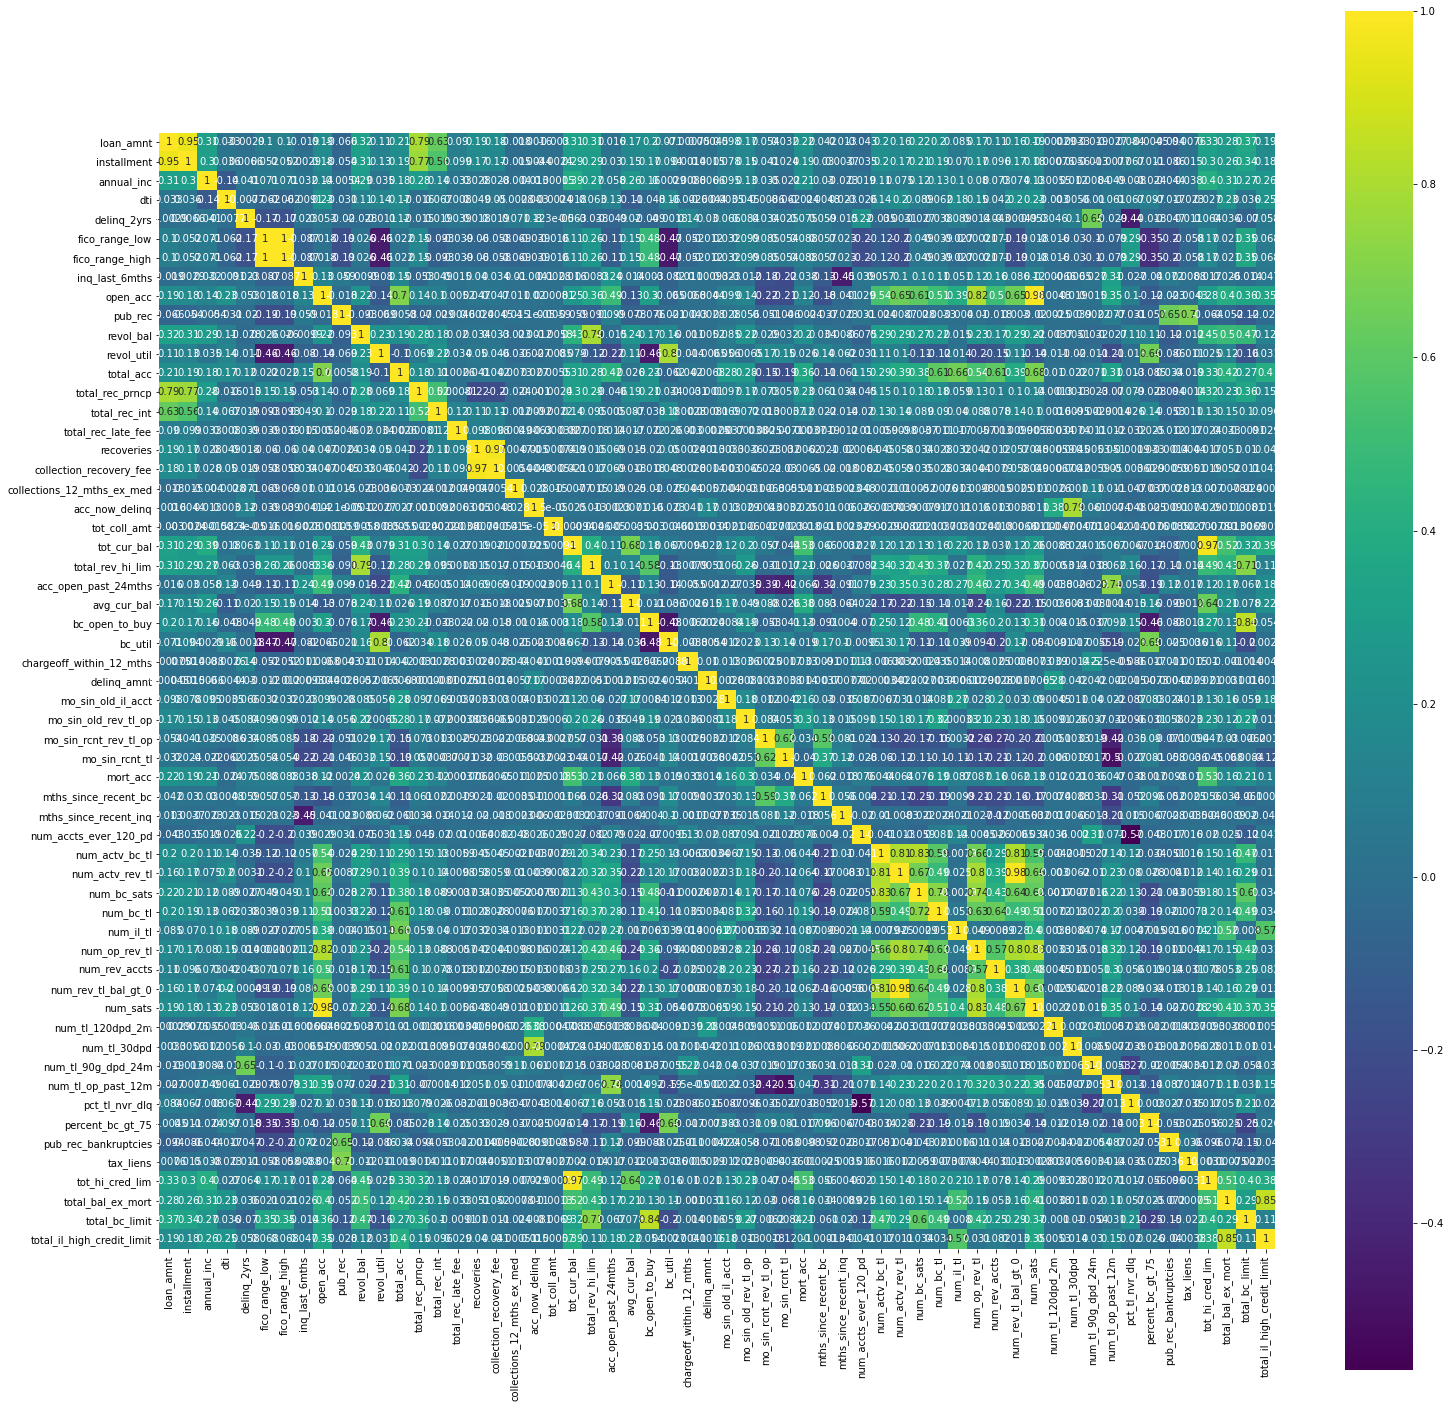

In [23]:
cor = data.corr()
plt.figure(figsize=(25,25))

sns.heatmap(cor, annot=True, cmap='viridis', square = True)

# Okay, Thats Great, There is no Null values in the data and Now we can Start Our Model

here we have problem with converting Object to float, so we can replace Categorical data with numbers that describe the classification work

In [24]:
#Convert columns Types 

data.term.replace((' 36 months', ' 60 months'),(36 ,60), inplace = True) 
data.emp_length.replace(('10+ years','2 years','< 1 year','3 years','1 year','5 years','4 years','6 years','8 years','7 years','9 years'),(10,2,0.5,3,1,5,4,6,8,7,9), inplace  = True)
data.home_ownership.replace(('MORTGAGE', 'RENT','OWN','ANY', 'OTHER','NONE'),(1,2,3,4,5,6), inplace = True) 
data.verification_status.replace(('Source Verified', 'Verified','Not Verified'),(1,2,3), inplace = True) 
data.loan_status.replace(('Fully Paid	', 'Charged Off	'),(1,0), inplace = True) 
data.purpose.replace(('debt_consolidation', 'credit_card','home_improvement','other', 'major_purchase','medical','small_business','car','moving','vacation','house','wedding','renewable_energy','educational'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14), inplace = True) 
data.application_type.replace(('Individual','Joint App'),(1,2), inplace  = True)


replace application_type data:
1. Individual = 1
1. Joint App = 2

replace purpose data:
1. debt_consolidation = 1
1. credit_card = 2
1. home_improvement = 3
1. other = 4
1. major_purchase = 5
1. medical = 6
1. small_business = 7
1. car = 8
1. moving = 9
1. vacation = 10
1. house = 11
1. wedding = 12
1. renewable_energy = 13
1. educational = 14

replace loan_status data:
1. Fully paid = 1
1. Charged of = 0

replace emp_length data:
1. 10+ years = 11
1. 2 years = 2
1. < 1 year = 0
1. 3 years = 3
1. 1 year = 1
1. 5 years = 5
1. 4 years = 4
1. 6 years = 6
1. 8 years = 8
1. 7 years = 7
1. 9 years = 9

replace home_ownership data:
1. MORTGAGE = 1.0
1. RENT = 2.0
1. OWN = 3.0
1. ANY = 4.0
1. NONE = 5.0
1. OTHER = 6.0

replace verification_status data:
1. Not Verified = 1.0
1. Source Verified = 2.0
1. Verified = 3.0

replace term data:
1. 36 months = 36
1. 60 months = 60


# Start our Classification model

let's split data to Input and Target

In [25]:
x = data.drop(columns =["loan_status"])
y = data["loan_status"]

In [41]:
data.shape

(1348059, 65)

Standarize data in simmilar range

In [26]:
scaler = StandardScaler()
scaler_data = scaler.fit_transform(x)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, shuffle = True)

In [28]:
log_model = LogisticRegression(solver= "sag", random_state= 33, max_iter = 1000)
log_model.fit(x_train,y_train)

C:\Users\avitr\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(max_iter=1000, random_state=33, solver='sag')

In [29]:
#model score with train data

log_model.score(x_train,y_train)


0.984395337888361

In [30]:
#model score with test data


log_model.score(x_test,y_test)

0.9845466818984319

In [31]:
print("Logistic Regression model train score is", log_model.score(x_train,y_train))

Logistic Regression model train score is 0.984395337888361


In [32]:
print("Logistic Regression model test score is", log_model.score(x_test,y_test))

Logistic Regression model test score is 0.9845466818984319


In [33]:
log_model.classes_

array(['Charged Off', 'Fully Paid'], dtype=object)

In [34]:
log_model.n_iter_

array([1000])

In [35]:
y_pred = log_model.predict(x_test)

# Calculate Confusion Matrix and Accuracy Score 

In [36]:
cm = confusion_matrix(y_test, y_pred)

In [37]:
print("Confusion Matrix is: \n ",cm)

Confusion Matrix is: 
  [[ 62165   5005]
 [   203 269642]]


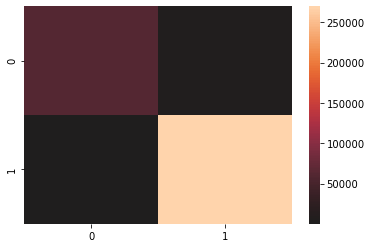

In [38]:
sns.heatmap(cm,center = True)
plt.show()
#Fully paid = 1
#Charged off = 0

In [39]:
AccScore = accuracy_score(y_test, y_pred, normalize= True)

In [40]:
print('Accuracy Score is: ', AccScore)

Accuracy Score is:  0.9845466818984319


In [ ]:
from sklearn.model_selection import GridSearchCV
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
logreg_cv = GridSearchCV(LR, param_grid=LRparam_grid, cv=3,scoring='accuracy',n_jobs=-1)
logreg_cv.fit(x_train, y_train)

# roc_auc
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

In [ ]:
from sklearn.model_selection import GridSearchCV
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
logreg_cv = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=3,scoring='accuracy',n_jobs=-1)
logreg_cv.fit(x_train, y_train)

# roc_auc
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))